#Imports

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms, utils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
import json
%matplotlib inline

# Load Pretrained Models

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
ssd_model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
ssd_model.to(device)
ssd_model.eval()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth


  0%|          | 0.00/136M [00:00<?, ?B/s]

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [ ]:
rcnn_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
rcnn_model.to(device)
rcnn_model.eval()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
retina_model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)
retina_model.to(device)
retina_model.eval()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth


  0%|          | 0.00/130M [00:00<?, ?B/s]

RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


# Preprocess Images

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])

# Load COCO Random Images

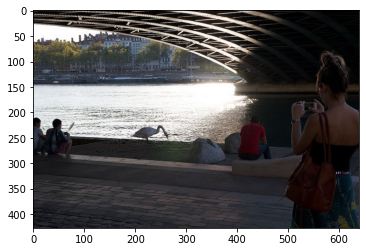

In [ ]:
img1 = Image.open(str('/content/img1.jpeg'))
plt.imshow(img1)

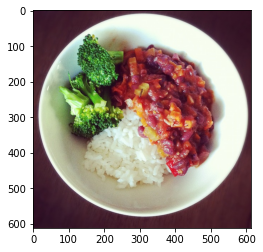

In [ ]:
img2 = Image.open(str('/content/img2.jpeg'))
plt.imshow(img2)

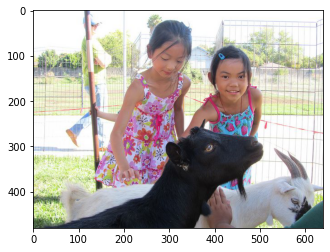

In [ ]:
img3 = Image.open(str('/content/img3.jpeg'))
plt.imshow(img3)

# Visulize all feature maps from convluation layers of the backbone network

In [ ]:
def get_feature_maps(net,org_image):
  # we will save the conv layer weights in this list
  model_weights =[]
  #we will save the 49 conv layers in this list
  conv_layers = []
  # get all the model children as list
  model_children = list(net.children())
  #counter to keep count of the conv layers
  counter = 0
  #append all the conv layers and their respective wights to the list
  for i in range(len(model_children)):
      if type(model_children[i]) == nn.Conv2d:
          counter+=1
          model_weights.append(model_children[i].weight)
          conv_layers.append(model_children[i])
      elif type(model_children[i]) == nn.Sequential:
          for j in range(len(model_children[i])):
              for child in model_children[i][j].children():
                  if type(child) == nn.Conv2d:
                      counter+=1
                      model_weights.append(child.weight)
                      conv_layers.append(child)

  image = transform(org_image)
  image = image.unsqueeze(0)
  image = image.to(device)
  outputs = []
  names = []

  for layer in conv_layers[0:]:
      image = layer(image)
      outputs.append(image)
      names.append(str(layer))
  processed = []
  for feature_map in outputs:
      feature_map = feature_map.squeeze(0)
      gray_scale = torch.sum(feature_map,0)
      gray_scale = gray_scale / feature_map.shape[0]
      processed.append(gray_scale.data.cpu().numpy())
  return processed,names


In [ ]:
def visualize_maps(processed,names):
  fig = plt.figure(figsize=(10, 12))
  for i in range(len(processed)):
      a = fig.add_subplot(10, 10, i+1)
      imgplot = plt.imshow(processed[i])
      a.axis("off")
      a.set_title(names[i].split('(')[0], fontsize=8)

# For SSD

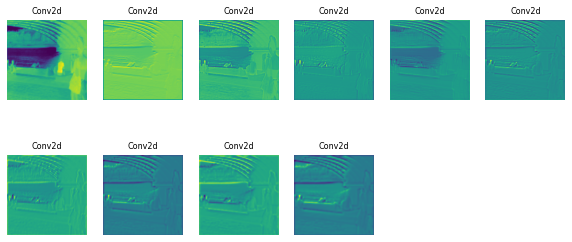

In [ ]:
processed,names = get = get_feature_maps(ssd_model.backbone.features,img1)
visualize_maps(processed,names)

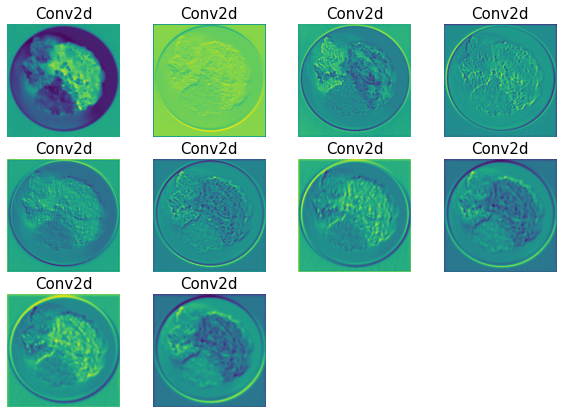

In [ ]:
processed,names = get = get_feature_maps(ssd_model.backbone.features,img2)
visualize_maps(processed,names)

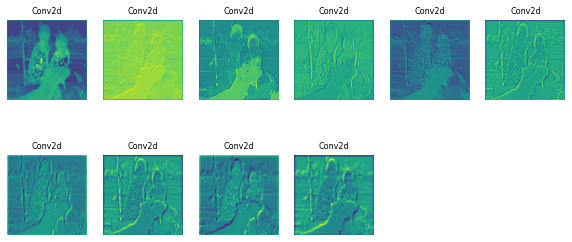

In [ ]:
processed,names = get = get_feature_maps(ssd_model.backbone.features,img3)
visualize_maps(processed,names)

#Faster R-CNN

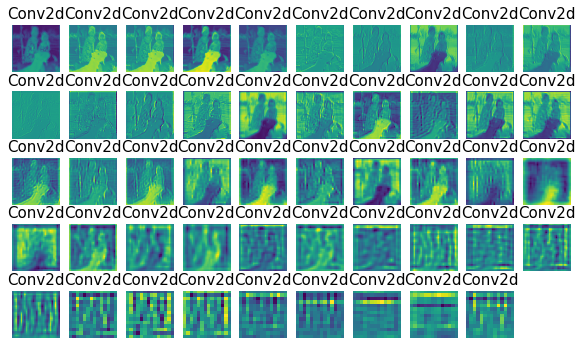

In [ ]:
# rcnn_model.backbone.body
processed,names = get = get_feature_maps(rcnn_model.backbone.body,img3)
visualize_maps(processed,names)

# For Faster R-CNN

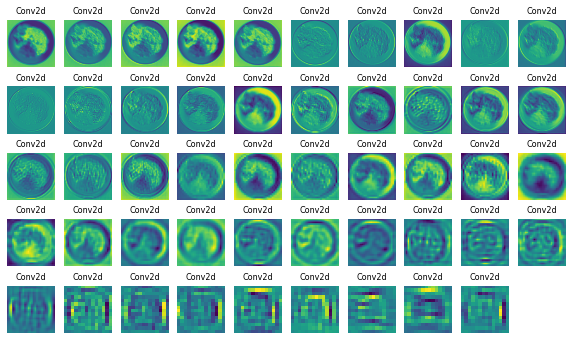

In [ ]:
processed,names = get = get_feature_maps(rcnn_model.backbone.body,img2)
visualize_maps(processed,names)

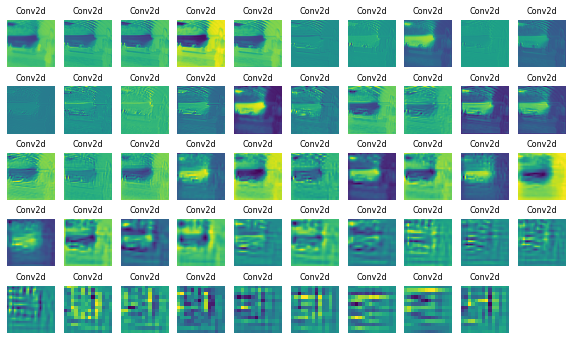

In [ ]:
processed,names = get = get_feature_maps(rcnn_model.backbone.body,img1)
visualize_maps(processed,names)

# RetinaNet 

In [ ]:
retina_model.backbone.body
# rcnn_model.backbone.body

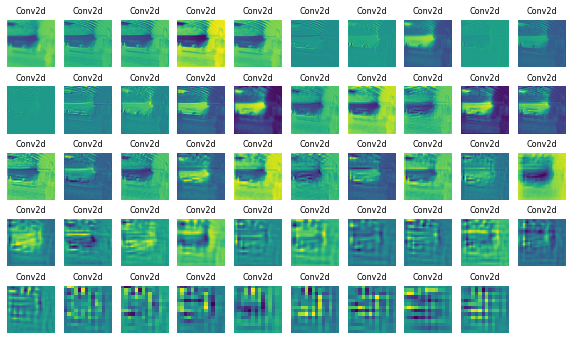

In [ ]:
processed,names = get = get_feature_maps(retina_model.backbone.body,img1)
visualize_maps(processed,names)

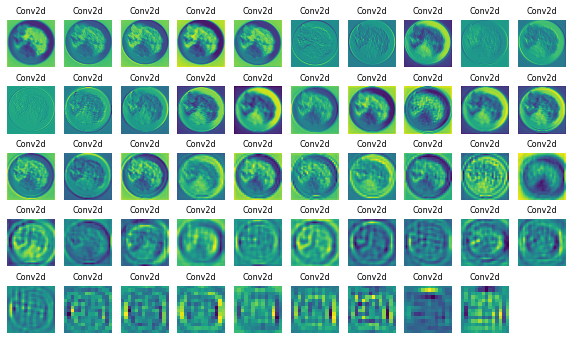

In [ ]:
processed,names = get = get_feature_maps(retina_model.backbone.body,img2)
visualize_maps(processed,names)

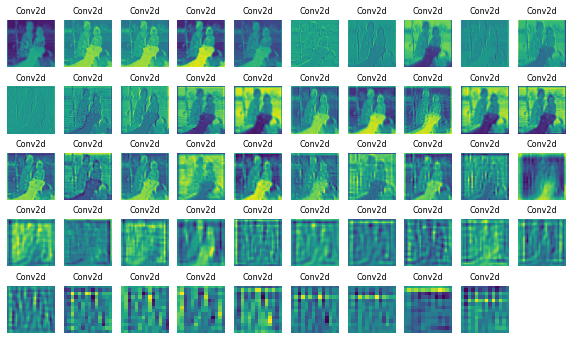

In [ ]:
processed,names = get = get_feature_maps(retina_model.backbone.body,img3)
visualize_maps(processed,names)